<h1 style="text-align: center; font-weight: bold;"><u>Étape 5 Réaliser une analyse multi-variée</u></h1>

<h2 style="font-weight: bold;">4.A)<u>ACP</u></h2> 

omega-3-fat_100g           319931
omega-6-fat_100g           320584
iron_100g                  180310
energy-from-fat_100g       319915
calcium_100g               179722
nutrition-score-fr_100g     99562
dtype: int64


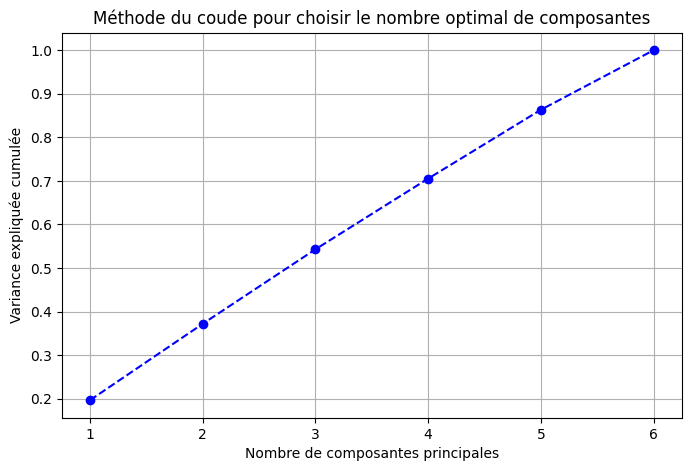

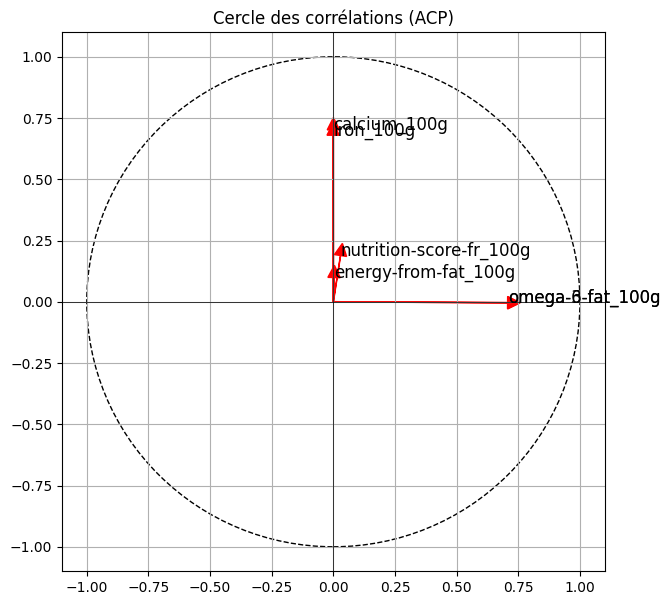

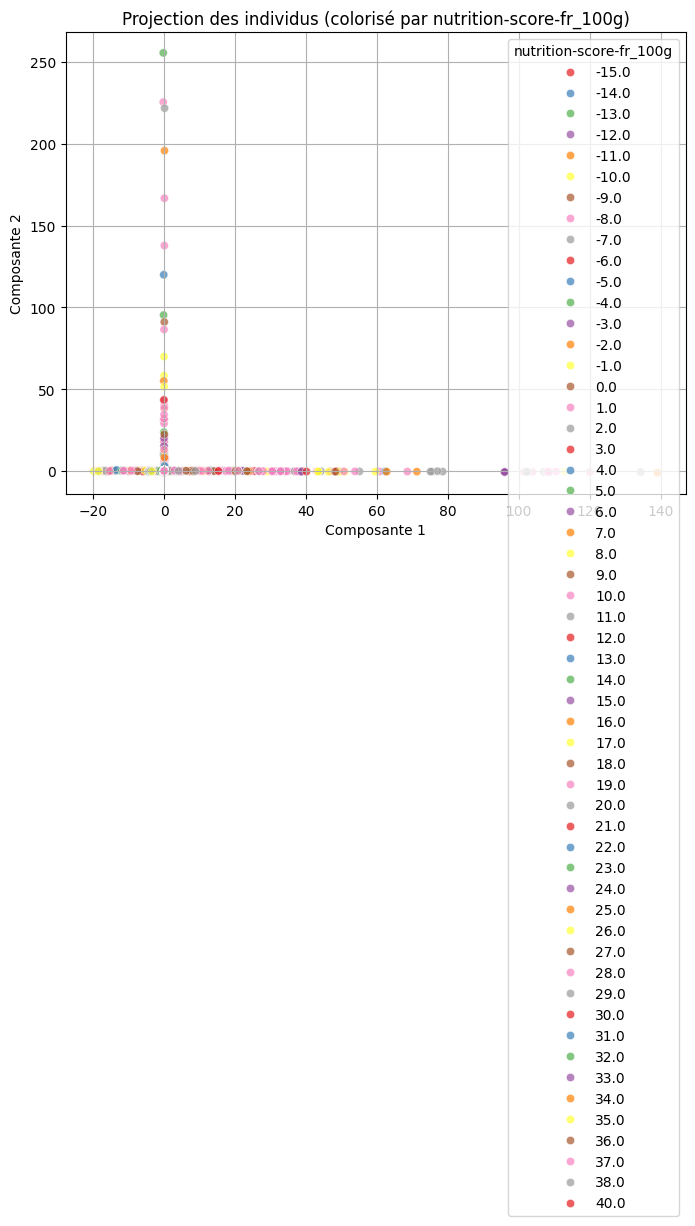

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from myFonctions import plot_scatter
from myFonctions import plot_elbow_curve2
from myFonctions import plot_correlation_circle
from myFonctions import plot_pca_projection

# Charger les données
df = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

# Sélectionner les variables quantitatives pour l'ACP
columns_for_pca = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'energy-from-fat_100g', 'calcium_100g', 'nutrition-score-fr_100g']

# Vérifier les valeurs manquantes
print(df[columns_for_pca].isna().sum())

# Remplacement des valeurs manquantes par la médiane
df_clean = df[columns_for_pca].fillna(df[columns_for_pca].median())

# Vérifier si le DataFrame est vide après correction
#print(f"Nombre total de lignes après remplacement des NaN : {df_clean.shape[0]}")

# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Affichage de la forme des données après standardisation
#print(f"Shape du dataset après standardisation: {df_scaled.shape}")

pca_model = plot_elbow_curve2(df_scaled)

# Appeler la fonction après l'entraînement de ton modèle PCA
plot_correlation_circle(pca_model, columns_for_pca)

# Exemple d'appel de la fonction
plot_pca_projection(pca_model, df_scaled, df_clean, "nutrition-score-fr_100g")
